# Welcome to Colab, {{USERNAME}}!

In [0]:
import google3
from google3.pyglib import gfile
from colabtools import saver
dpath = "/cns/it-d/home/sunilsn/carnd/t1/p2/data/python2/"

state = saver.State(dpath+'train_p2.p.gz')
state.names.clear()
state.names.update(['features','labels','coords','sizes'])
state.restore(which='all')
train_features = features
train_labels = labels
train_coords = coords
train_sizes = sizes

state = saver.State(dpath+'test_p2.p.gz')
state.names.clear()
state.names.update(['features','labels','coords','sizes'])
state.restore(which='all')
test_features = features
test_labels = labels
test_coords = coords
test_sizes = sizes

state = saver.State(dpath+'valid_p2.p.gz')
state.names.clear()
state.names.update(['features','labels','coords','sizes'])
state.restore(which='all')
valid_features = features
valid_labels = labels
valid_coords = coords
valid_sizes = sizes




In [2]:
def display_info(features,labels,coords,sizes):
  print(features.shape)
  print(labels.shape)
  print(coords.shape)
  print(sizes.shape)
  
display_info(train_features,train_labels,train_coords,train_sizes)
display_info(test_features,test_labels,test_coords,test_sizes)
display_info(valid_features,valid_labels,valid_coords,valid_sizes)

(34799, 32, 32, 3)
(34799,)
(34799, 4)
(34799, 2)
(12630, 32, 32, 3)
(12630,)
(12630, 4)
(12630, 2)
(4410, 32, 32, 3)
(4410,)
(4410, 4)
(4410, 2)


42


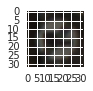

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

index = random.randint(0, len(train_features))
image = train_features[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(train_labels[index])


(array([  180.,  1980.,  2010.,  1260.,  1770.,  1650.,   360.,  1290.,
         1260.,  1320.,  1800.,  1170.,  1890.,  1920.,   690.,   540.,
          360.,   990.,  1080.,   180.,   300.,   270.,   330.,   450.,
          240.,  1350.,   540.,   210.,   480.,   240.,   390.,   690.,
          210.,   599.,   360.,  1080.,   330.,   180.,  1860.,   270.,
          300.,   210.,   210.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

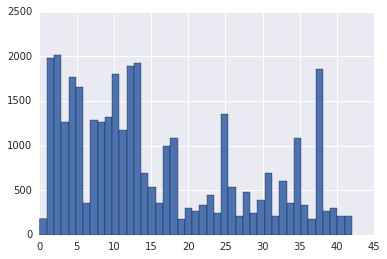

In [4]:
plt.hist(train_labels,43)

In [0]:
from sklearn.utils import shuffle

train_features, train_labels = shuffle(train_features, train_labels)

In [0]:
import tensorflow as tf

EPOCHS = 90
BATCH_SIZE = 512

In [0]:
#from tensorflow.contrib.layers import flatten
def gaussian_noise_layer(input_layer, std):
    noise = tf.random_normal(shape=tf.shape(input_layer), mean=0.0, stddev=std, dtype=tf.float32) 
    return input_layer + noise
  
from google3.third_party.tensorflow.contrib.layers import flatten
def LeNet(x,keep_prob,is_train):    
    mu = 0
    sigma = 0.1
    #add gaussian noise to random 30% of examples in every training batch
    noise = tf.random_normal(shape=tf.shape(x),stddev=0.05,dtype=tf.float32)
    subset = tf.random_uniform(shape=tf.shape(x))
    noise_multiplier = tf.where(subset>0.3, tf.ones_like(x), tf.zeros_like(x))
    
    #don't add the noise if this is not a training step
    noisy_x = tf.where(is_train,x+noise_multiplier*noise,x)
    
    #concatenate hsv and grayscale images
    hsv_x = tf.image.rgb_to_hsv(noisy_x)
    gray_x = tf.image.rgb_to_grayscale(noisy_x)
    hsvg_x = tf.concat([hsv_x,gray_x],axis=3)
    
    #per_image_standardization
    hsvg_x = tf.map_fn(tf.image.per_image_standardization,hsvg_x)
    
    
    conv0_W = tf.Variable(tf.truncated_normal(shape=(5,5,4,6), mean=mu,stddev =sigma))
    conv0_b = tf.Variable(tf.zeros(6))
    conv0 = tf.nn.conv2d(hsvg_x, conv0_W, strides=[1,1,1,1], padding='SAME')+ conv0_b  
    conv0 = tf.nn.relu(conv0)
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x6. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(conv0, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    fc12_W = tf.Variable(tf.truncated_normal(shape=(120, 120), mean = mu, stddev = sigma))
    fc12_b = tf.Variable(tf.zeros(120))
    fc12   = tf.matmul(fc1, fc12_W) + fc12_b
    fc12 = tf.nn.relu(fc12)
    fc12 = tf.nn.dropout(fc12,keep_prob)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc12, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2,keep_prob)
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    fc3 = tf.matmul(fc2, fc3_W) + fc3_b
    fc3 = tf.nn.relu(fc3)
    fc3 = tf.nn.dropout(fc3,keep_prob)
    
    fc4_W = tf.Variable(tf.truncated_normal(shape=(43,43),mean=mu,stddev = sigma))
    fc4_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc3,fc4_W)+fc4_b
    
    return logits

In [0]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [0]:

step = tf.Variable(0, trainable=False)
is_train = tf.Variable(True,trainable=False)
rate = tf.train.exponential_decay(0.001, step, 1, 1.0)

logits = LeNet(x,keep_prob,is_train)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation,global_step=step)

In [0]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: 1.0,is_train:False})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [15]:
model_path = '/cns/it-d/home/sunilsn/carnd/t1/p2/model/model.dat'
save_path = '/cns/it-d/home/sunilsn/carnd/t1/p2/model'
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #saver.restore(sess, tf.train.latest_checkpoint(save_path))
    num_examples = len(train_features)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        train_features, train_labels = shuffle(train_features, train_labels)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = train_features[offset:end], train_labels[offset:end]
            rateval,_ = sess.run([rate,training_operation], feed_dict={x: batch_x, y: batch_y,keep_prob:0.5,is_train:True})
        validation_accuracy = evaluate(valid_features, valid_labels)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print(" rate : ",rateval)
        if((i+1)%5==0):
          train_accuracy = evaluate(train_features,train_labels)    
          print("train Accuracy = {:.3f}".format(train_accuracy))
        print()
    saver.save(sess, model_path)
    print("Model saved")

Training...
()
EPOCH 1 ...
Validation Accuracy = 0.216
(' rate : ', 0.001)
()
EPOCH 2 ...
Validation Accuracy = 0.351
(' rate : ', 0.001)
()
EPOCH 3 ...
Validation Accuracy = 0.510
(' rate : ', 0.001)
()
EPOCH 4 ...
Validation Accuracy = 0.600
(' rate : ', 0.001)
()
EPOCH 5 ...
Validation Accuracy = 0.651
(' rate : ', 0.001)
train Accuracy = 0.699
()
EPOCH 6 ...
Validation Accuracy = 0.691
(' rate : ', 0.001)
()
EPOCH 7 ...
Validation Accuracy = 0.753
(' rate : ', 0.001)
()
EPOCH 8 ...
Validation Accuracy = 0.771
(' rate : ', 0.001)
()
EPOCH 9 ...
Validation Accuracy = 0.805
(' rate : ', 0.001)
()
EPOCH 10 ...
Validation Accuracy = 0.812
(' rate : ', 0.001)
train Accuracy = 0.859
()
EPOCH 11 ...
Validation Accuracy = 0.809
(' rate : ', 0.001)
()
EPOCH 12 ...
Validation Accuracy = 0.838
(' rate : ', 0.001)
()
EPOCH 13 ...
Validation Accuracy = 0.826
(' rate : ', 0.001)
()
EPOCH 14 ...
Validation Accuracy = 0.845
(' rate : ', 0.001)
()
EPOCH 15 ...
Validation Accuracy = 0.839
(' rate : '


Validation Accuracy = 0.935
(' rate : ', 0.001)
train Accuracy = 0.984
()
EPOCH 51 ...
Validation Accuracy = 0.927
(' rate : ', 0.001)
()
EPOCH 52 ...
Validation Accuracy = 0.922
(' rate : ', 0.001)
()
EPOCH 53 ...
Validation Accuracy = 0.935
(' rate : ', 0.001)
()
EPOCH 54 ...
Validation Accuracy = 0.939
(' rate : ', 0.001)
()
EPOCH 55 ...
Validation Accuracy = 0.939
(' rate : ', 0.001)
train Accuracy = 0.988
()
EPOCH 56 ...
Validation Accuracy = 0.944
(' rate : ', 0.001)
()
EPOCH 57 ...
Validation Accuracy = 0.935
(' rate : ', 0.001)
()
EPOCH 58 ...
Validation Accuracy = 0.935
(' rate : ', 0.001)
()
EPOCH 59 ...
Validation Accuracy = 0.933
(' rate : ', 0.001)
()
EPOCH 60 ...
Validation Accuracy = 0.931
(' rate : ', 0.001)
train Accuracy = 0.991
()
EPOCH 61 ...
Validation Accuracy = 0.926
(' rate : ', 0.001)
()
EPOCH 62 ...
Validation Accuracy = 0.938
(' rate : ', 0.001)
()
EPOCH 63 ...
Validation Accuracy = 0.937
(' rate : ', 0.001)
()
EPOCH 64 ...
Validation Accuracy = 0.943
(' rat

In [16]:
save_path = '/cns/it-d/home/sunilsn/carnd/t1/p2/model'
with tf.Session() as sess:
  saver.restore(sess, tf.train.latest_checkpoint(save_path))
  test_accuracy = evaluate(test_features, test_labels)
  print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.925


In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google3.pyglib import gfile
import pandas as pd
import tensorflow as tf
from PIL import Image
import numpy as np
#img = Image.open('../_static/stinkbug.png')
#img.thumbnail((64, 64), Image.ANTIALIAS)

['00000.ppm', '00001.ppm', '00002.ppm', '00003.ppm', '00004.ppm']
(16, array([16, 41,  9, 42,  5], dtype=int32), array([  7.84423411e-01,   2.11383969e-01,   3.39626940e-03,
         6.29920512e-04,   1.07775137e-04], dtype=float32))
(1, array([13,  2,  1, 15, 12], dtype=int32), array([ 0.67697066,  0.24131474,  0.04587835,  0.01177709,  0.00604357], dtype=float32))
(38, array([38, 18, 35, 41, 36], dtype=int32), array([  1.00000000e+00,   1.67303748e-30,   2.60379287e-32,
         3.56358652e-37,   3.09313290e-38], dtype=float32))
(33, array([14, 34, 17, 13, 33], dtype=int32), array([ 0.45079601,  0.23832136,  0.13095562,  0.10523793,  0.0457208 ], dtype=float32))
(11, array([11, 30,  0,  1,  2], dtype=int32), array([  1.00000000e+00,   1.58710969e-14,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00], dtype=float32))


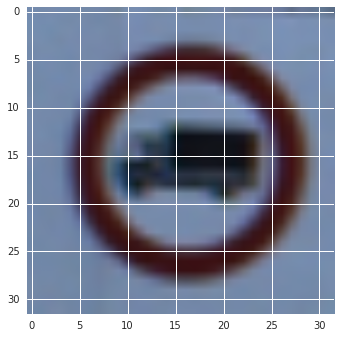

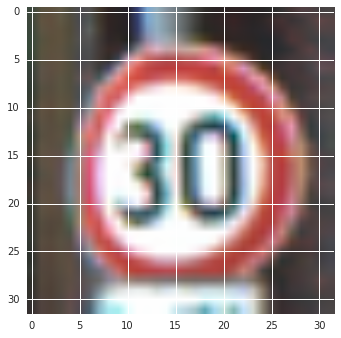

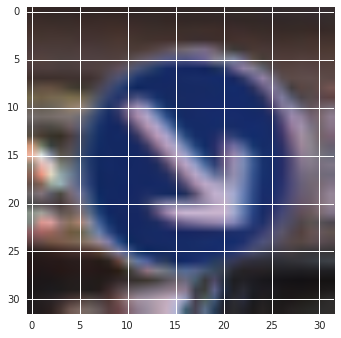

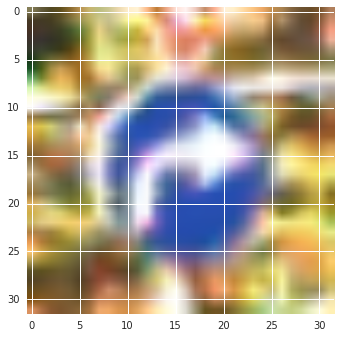

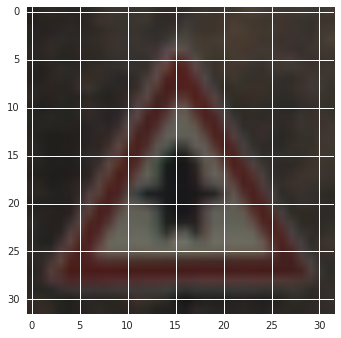

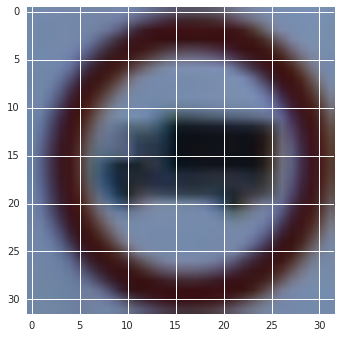

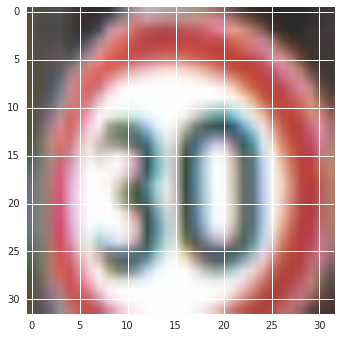

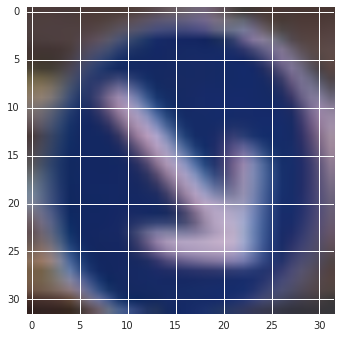

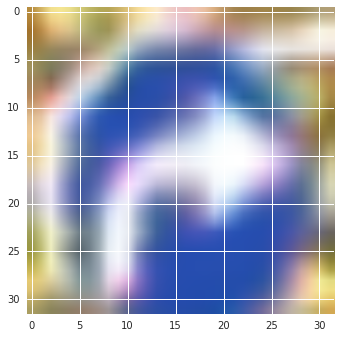

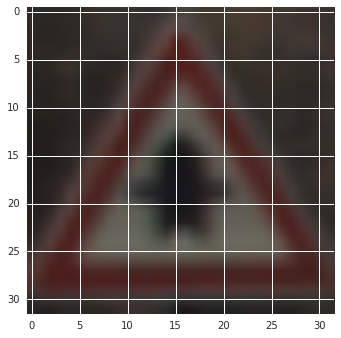

In [22]:
if False:
  acquired_images_dir = '/cns/it-d/home/sunilsn/carnd/t1/p2/data/acquired_images/'
  image_paths = ['459381035.jpg','459381087.jpg','459381095.jpg','459381111.jpg','459381113.jpg']
  labels = [21,-1,-1,-1,2]
  boxes = [(100,50,270,310),(70,50,320,320),(30,50,290,310),(50,100,190,260),(120,50,370,320)]
  h = 478.0
  w = 359.0
  boxes = [(a/h,b/h,c/w,c/w) for a,b,c,d in boxes]
  boxinds = [0,1,2,3,4]
  num_images = 5
elif False:
  acquired_images_dir = '/cns/it-d/home/sunilsn/carnd/t1/p2/data/rand1/'
  image_paths = ['acquired_{0:0>2}.ppm'.format(i) for i in range(43)]
  boxes=[(0.0,0.0,1.0,1.0)]*43
  boxinds = list(range(43))
  labels = boxinds
  num_images = 43
else:
  num_images = 5
  acquired_images_dir = '/cns/it-d/home/sunilsn/carnd/t1/p2/data/Images/'
  csv_path = acquired_images_dir+'GT-final_test.test.csv'
  image_paths = []
  boxes = []
  labels=[16,1,38,33,11]
  header = 'Filename;Width;Height;Roi.X1;Roi.Y1;Roi.X2;Roi.Y2'
  with gfile.FastGFile(csv_path,'r') as gf:
    df = pd.read_csv(gf,sep=';',dtype={'Filename':str,'Width': np.int32, 'Height': np.int32, 'Roi.X1': np.int32, 'Roi.Y1': np.int32, 'Roi.X2': np.int32, 'Roi.Y2': np.int32} )
    #df = df.sample(num_images)
    for i in range(num_images):
      image_paths.append(df.loc[i,'Filename'])
      w = float(df.loc[i,'Width'])
      h = float(df.loc[i,'Height'])
      a = df.loc[i,'Roi.X1']
      b = df.loc[i,'Roi.Y1']
      c = df.loc[i,'Roi.X2']
      d = df.loc[i,'Roi.Y2']
      boxes.append((a/w,b/w,c/h,d/h))
      
    boxinds = list(range(num_images))
      
print(image_paths)     

images = []
for img_path in image_paths[:num_images]:
  with gfile.FastGFile(acquired_images_dir+img_path,'r') as gf:
    plt.figure()
    img = Image.open(gf)
    img = img.resize((32,32),Image.ANTIALIAS)
    img = np.asarray(img)
    images.append(img)
    plt.imshow(images[-1])

images = np.asarray(images)
cropped_images_op = tf.image.crop_and_resize(images,boxes,boxinds,[32,32])
probs = tf.nn.softmax(logits)
k=5
topk_probs,topk_probs_labels = tf.nn.top_k(probs,k)
topk_logits,topk_logits_labels = tf.nn.top_k(logits,k)
with tf.Session() as sess:
  saver.restore(sess, tf.train.latest_checkpoint(save_path))
  cropped_images = sess.run(cropped_images_op)
  cropped_images_logits_labels,cropped_images_logits,cropped_images_probs_labels,cropped_images_probs = sess.run([topk_logits_labels,topk_logits,topk_probs_labels,topk_probs],{x:cropped_images,keep_prob:1.0,is_train:False})
for i in range(num_images):
  print(labels[i],cropped_images_probs_labels[i],cropped_images_probs[i])
for cimg in cropped_images:
  plt.figure()
  plt.imshow(cimg.astype('uint8'))
